In [2]:
# prompt: import pandas as pd

import pandas as pd


In [4]:
df=pd.read_csv('MSFT.csv')

In [16]:
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,1986-03-13,0.088542,0.101563,0.088542,0.097222,0.059946,1031788800
1,1986-03-14,0.097222,0.102431,0.097222,0.100694,0.062087,308160000
2,1986-03-17,0.100694,0.103299,0.100694,0.102431,0.063158,133171200
3,1986-03-18,0.102431,0.103299,0.098958,0.099826,0.061552,67766400
4,1986-03-19,0.099826,0.100694,0.097222,0.098090,0.060482,47894400
...,...,...,...,...,...,...,...
9689,2024-08-23,416.980011,419.260010,412.089996,416.790009,416.790009,18493800
9690,2024-08-26,416.369995,417.279999,411.339996,413.489990,413.489990,13152800
9691,2024-08-27,412.859985,414.359985,410.250000,413.839996,413.839996,13492900
9692,2024-08-28,414.880005,415.000000,407.309998,410.600006,410.600006,14882700


In [5]:
import datetime
def str_date(s):
  split=s.split('-')
  year,month,day=int(split[0]),int(split[1]),int(split[2])
  return datetime.datetime(year=year,month=month,day=day)

In [6]:
df['Date']=df['Date'].apply(str_date)
df['Date']

,Date
0,1986-03-13
1,1986-03-14
2,1986-03-17
3,1986-03-18
4,1986-03-19
...,...
9689,2024-08-23
9690,2024-08-26
9691,2024-08-27
9692,2024-08-28


In [7]:
df.index=df.pop('Date')
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1986-03-13,0.088542,0.101563,0.088542,0.097222,0.059946,1031788800
1986-03-14,0.097222,0.102431,0.097222,0.100694,0.062087,308160000
1986-03-17,0.100694,0.103299,0.100694,0.102431,0.063158,133171200
1986-03-18,0.102431,0.103299,0.098958,0.099826,0.061552,67766400
1986-03-19,0.099826,0.100694,0.097222,0.098090,0.060482,47894400
...,...,...,...,...,...,...
2024-08-23,416.980011,419.260010,412.089996,416.790009,416.790009,18493800
2024-08-26,416.369995,417.279999,411.339996,413.489990,413.489990,13152800
2024-08-27,412.859985,414.359985,410.250000,413.839996,413.839996,13492900


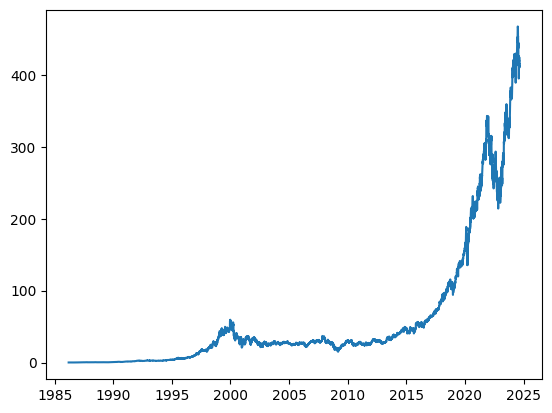

In [8]:
import matplotlib.pyplot as plt
plt.plot(df.index,df['Close'])

In [9]:
import numpy as np

def df_to_windowed_df(dataframe, first_date_str, last_date_str, n=3):
  first_date = str_date(first_date_str)
  last_date  = str_date(last_date_str)

  target_date = first_date

  dates = []
  X, Y = [], []

  last_time = False
  while True:
    df_subset = dataframe.loc[:target_date].tail(n+1)

    if len(df_subset) != n+1:
      print(f'Error: Window of size {n} is too large for date {target_date}')
      return

    values = df_subset['Close'].to_numpy()
    x, y = values[:-1], values[-1]

    dates.append(target_date)
    X.append(x)
    Y.append(y)

    next_week = dataframe.loc[target_date:target_date+datetime.timedelta(days=7)]
    next_datetime_str = str(next_week.head(2).tail(1).index.values[0])
    next_date_str = next_datetime_str.split('T')[0]
    year_month_day = next_date_str.split('-')
    year, month, day = year_month_day
    next_date = datetime.datetime(day=int(day), month=int(month), year=int(year))

    if last_time:
      break

    target_date = next_date

    if target_date == last_date:
      last_time = True

  ret_df = pd.DataFrame({})
  ret_df['Target Date'] = dates

  X = np.array(X)
  for i in range(0, n):
    X[:, i]
    ret_df[f'Target-{n-i}'] = X[:, i]

  ret_df['Target'] = Y

  return ret_df

# Start day second time around: '2021-03-25'
windowed_df = df_to_windowed_df(df,
                                '2022-08-29',
                                '2024-08-29',
                                n=3)
windowed_df

,Target Date,Target-3,Target-2,Target-1,Target
0,2022-08-29,275.790009,278.850006,268.089996,265.230011
1,2022-08-30,278.850006,268.089996,265.230011,262.970001
2,2022-08-31,268.089996,265.230011,262.970001,261.470001
3,2022-09-01,265.230011,262.970001,261.470001,260.399994
4,2022-09-02,262.970001,261.470001,260.399994,256.059998
...,...,...,...,...,...
499,2024-08-23,424.799988,424.140015,415.549988,416.790009
500,2024-08-26,424.140015,415.549988,416.790009,413.489990
501,2024-08-27,415.549988,416.790009,413.489990,413.839996
502,2024-08-28,416.790009,413.489990,413.839996,410.600006


In [10]:
def windowed_df_to_date_X_y(windowed_dataframe):
  df_as_np = windowed_dataframe.to_numpy()

  dates = df_as_np[:, 0]

  middle_matrix = df_as_np[:, 1:-1]
  X = middle_matrix.reshape((len(dates), middle_matrix.shape[1], 1))

  Y = df_as_np[:, -1]

  return dates, X.astype(np.float32), Y.astype(np.float32)

dates, X, y = windowed_df_to_date_X_y(windowed_df)

dates.shape, X.shape, y.shape

((504,), (504, 3, 1), (504,))

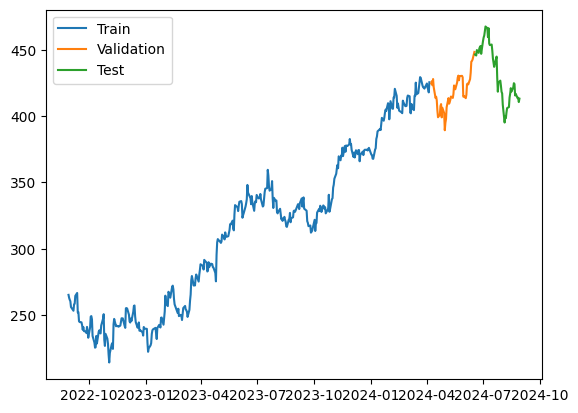

In [11]:
q_80 = int(len(dates) * .8)
q_90 = int(len(dates) * .9)

dates_train, X_train, y_train = dates[:q_80], X[:q_80], y[:q_80]

dates_val, X_val, y_val = dates[q_80:q_90], X[q_80:q_90], y[q_80:q_90]
dates_test, X_test, y_test = dates[q_90:], X[q_90:], y[q_90:]

plt.plot(dates_train, y_train)
plt.plot(dates_val, y_val)
plt.plot(dates_test, y_test)

plt.legend(['Train', 'Validation', 'Test'])

In [12]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import layers

model = Sequential([layers.Input((3, 1)),
                    layers.LSTM(64),
                    layers.Dense(32, activation='relu'),
                    layers.Dense(32, activation='relu'),
                    layers.Dense(1)])

model.compile(loss='mse',
              optimizer=Adam(learning_rate=0.001),
              metrics=['mean_absolute_error'])

model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=100)

Epoch 1/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 4s 41ms/step - loss: 101322.3516 - mean_absolute_error: 312.5397 - val_loss: 173862.1406 - val_mean_absolute_error: 416.7721
Epoch 2/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 98739.4375 - mean_absolute_error: 308.6233 - val_loss: 172382.5625 - val_mean_absolute_error: 414.9933
Epoch 3/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 96397.2500 - mean_absolute_error: 304.2985 - val_loss: 170084.2031 - val_mean_absolute_error: 412.2148
Epoch 4/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 96386.1094 - mean_absolute_error: 304.9162 - val_loss: 166630.6562 - val_mean_absolute_error: 408.0043
Epoch 5/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 94676.1719 - mean_absolute_error: 301.7592 - val_loss: 161496.9375 - val_mean_absolute_error: 401.6637
Epoch 6/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 88850.4609 - mean_absolute_error: 292.0503 - val_loss: 154677.2969 - val_mean_absolute_error: 393.0827
Epoch 7/100
13/13 ━━━━━━━━

13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step


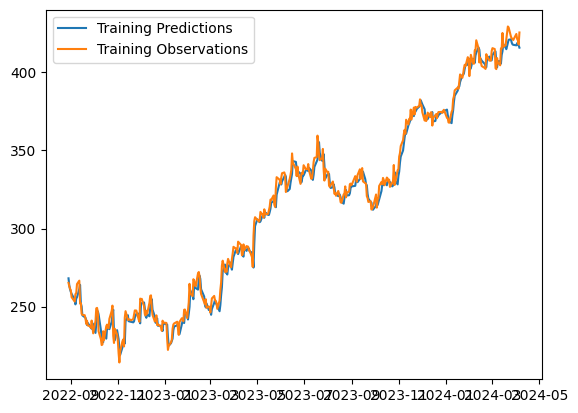

In [13]:
train_predictions = model.predict(X_train).flatten()

plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)
plt.legend(['Training Predictions', 'Training Observations'])

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 


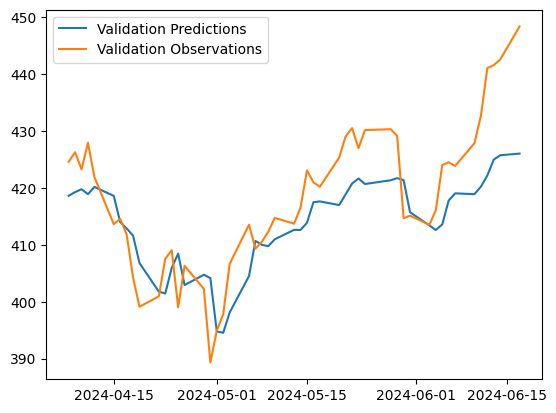

In [14]:
val_predictions = model.predict(X_val).flatten()

plt.plot(dates_val, val_predictions)
plt.plot(dates_val, y_val)
plt.legend(['Validation Predictions', 'Validation Observations'])

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 


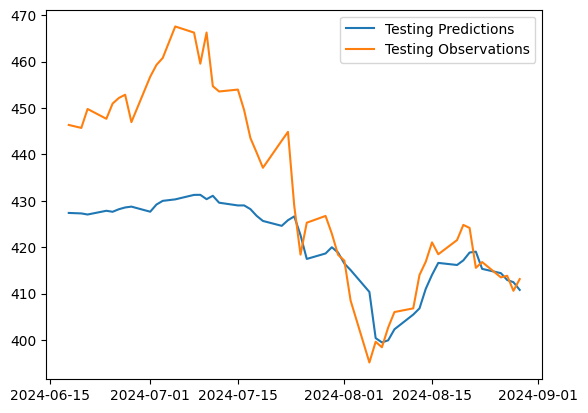

In [15]:
test_predictions = model.predict(X_test).flatten()

plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
plt.legend(['Testing Predictions', 'Testing Observations'])

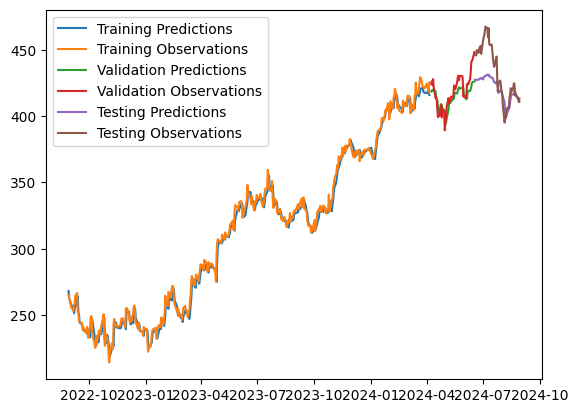

In [16]:
plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)
plt.plot(dates_val, val_predictions)
plt.plot(dates_val, y_val)
plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
plt.legend(['Training Predictions',
            'Training Observations',
            'Validation Predictions',
            'Validation Observations',
            'Testing Predictions',
            'Testing Observations'])

In [17]:
from copy import deepcopy

recursive_predictions = []
recursive_dates = np.concatenate([dates_val, dates_test])

for target_date in recursive_dates:
  last_window = deepcopy(X_train[-1])
  next_prediction = model.predict(np.array([last_window])).flatten()
  recursive_predictions.append(next_prediction)
  last_window[-1] = next_prediction

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━

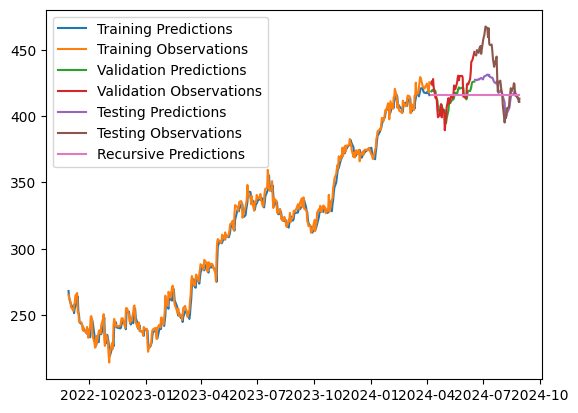

In [18]:
plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)
plt.plot(dates_val, val_predictions)
plt.plot(dates_val, y_val)
plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
plt.plot(recursive_dates, recursive_predictions)
plt.legend(['Training Predictions',
            'Training Observations',
            'Validation Predictions',
            'Validation Observations',
            'Testing Predictions',
            'Testing Observations',
            'Recursive Predictions'])